In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()

In [3]:
print(dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
# print(dataset["target"])
print(dataset['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [7]:
print(dataset["target"])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [8]:
import pandas as pd
df = pd.DataFrame(dataset["data"], columns=dataset['feature_names'])

In [9]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
X = df

In [11]:
y = dataset['target']

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [13]:
from sklearn.tree import DecisionTreeRegressor
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

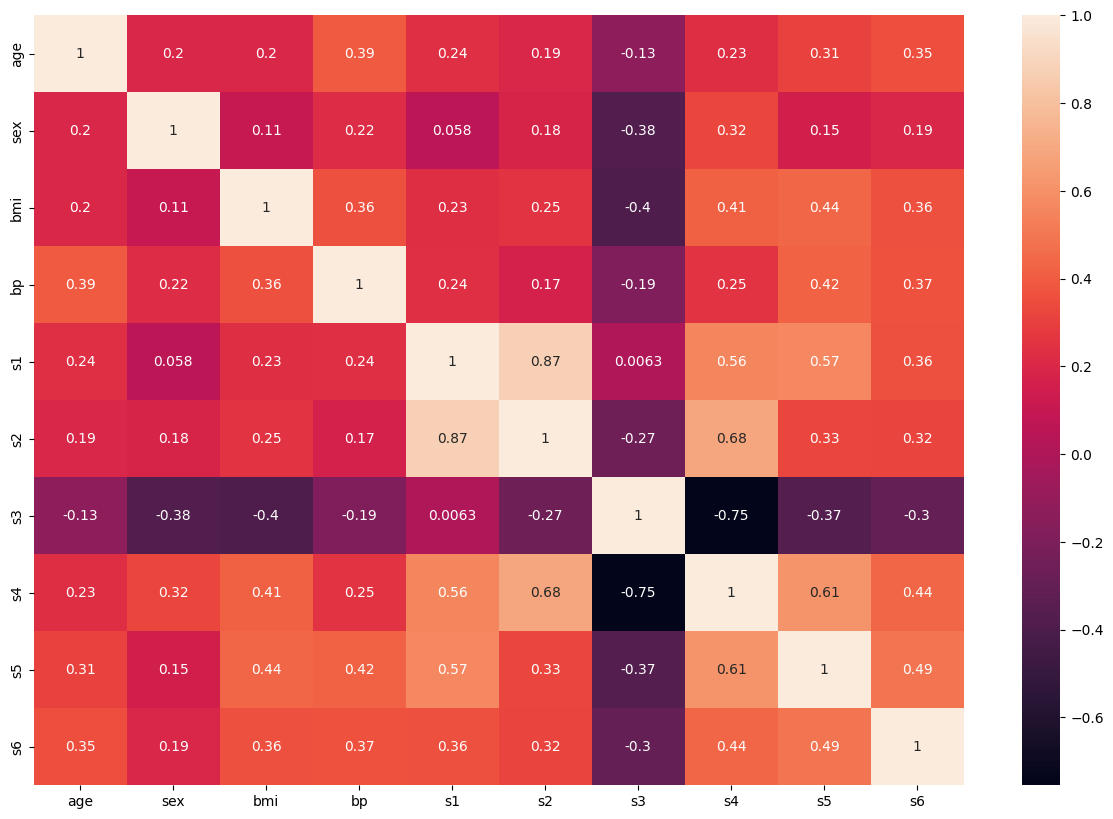

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(data=X_train.corr(), annot=True)

In [17]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-0.1610170194142646
66.02255639097744
7346.533834586467


In [20]:
# Hyperparameter Tuning
param_grid = {
  'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
  'splitter': ['best', 'random'],
  'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
  'max_features': ['auto', 'sqrt', 'log2', 'int', 'float']
}

In [23]:
grid = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3, refit=True)

In [24]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] E

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2', 'int',
                                          'float'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [25]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [26]:
grid.best_score_

np.float64(-3917.803858532077)

In [27]:
y_pred_grid = grid.predict(X_test)

In [28]:
print(r2_score(y_test, y_pred_grid))
print(mean_absolute_error(y_test, y_pred_grid))
print(mean_squared_error(y_test, y_pred_grid))

0.26845922167607905
56.136066427326405
4628.949437836616


In [31]:
model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, splitter='best', max_features='log2')
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2')

[Text(0.5, 0.9, 'x[8] <= 0.022\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.7, 'x[9] <= -0.032\nfriedman_mse = 4016.257\nsamples = 205\nvalue = 123.444'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[0] <= -0.033\nfriedman_mse = 2579.096\nsamples = 63\nvalue = 104.825'),
 Text(0.0625, 0.3, 'x[2] <= -0.015\nfriedman_mse = 2890.097\nsamples = 28\nvalue = 117.214'),
 Text(0.03125, 0.1, 'friedman_mse = 782.386\nsamples = 18\nvalue = 94.056'),
 Text(0.09375, 0.1, 'friedman_mse = 3980.89\nsamples = 10\nvalue = 158.9'),
 Text(0.1875, 0.3, 'x[9] <= -0.045\nfriedman_mse = 2109.278\nsamples = 35\nvalue = 94.914'),
 Text(0.15625, 0.1, 'friedman_mse = 2308.652\nsamples = 26\nvalue = 104.962'),
 Text(0.21875, 0.1, 'friedman_mse = 399.21\nsamples = 9\nvalue = 65.889'),
 Text(0.375, 0.5, 'x[6] <= -0.016\nfriedman_mse = 4431.842\nsamples = 142\nvalue = 131.704'),
 Text(0.3125, 0.3, 'x[8] <= -0.043\nfriedman_mse = 4939.013\nsamples = 52\nvalue = 163.288'),
 Text(0.2812

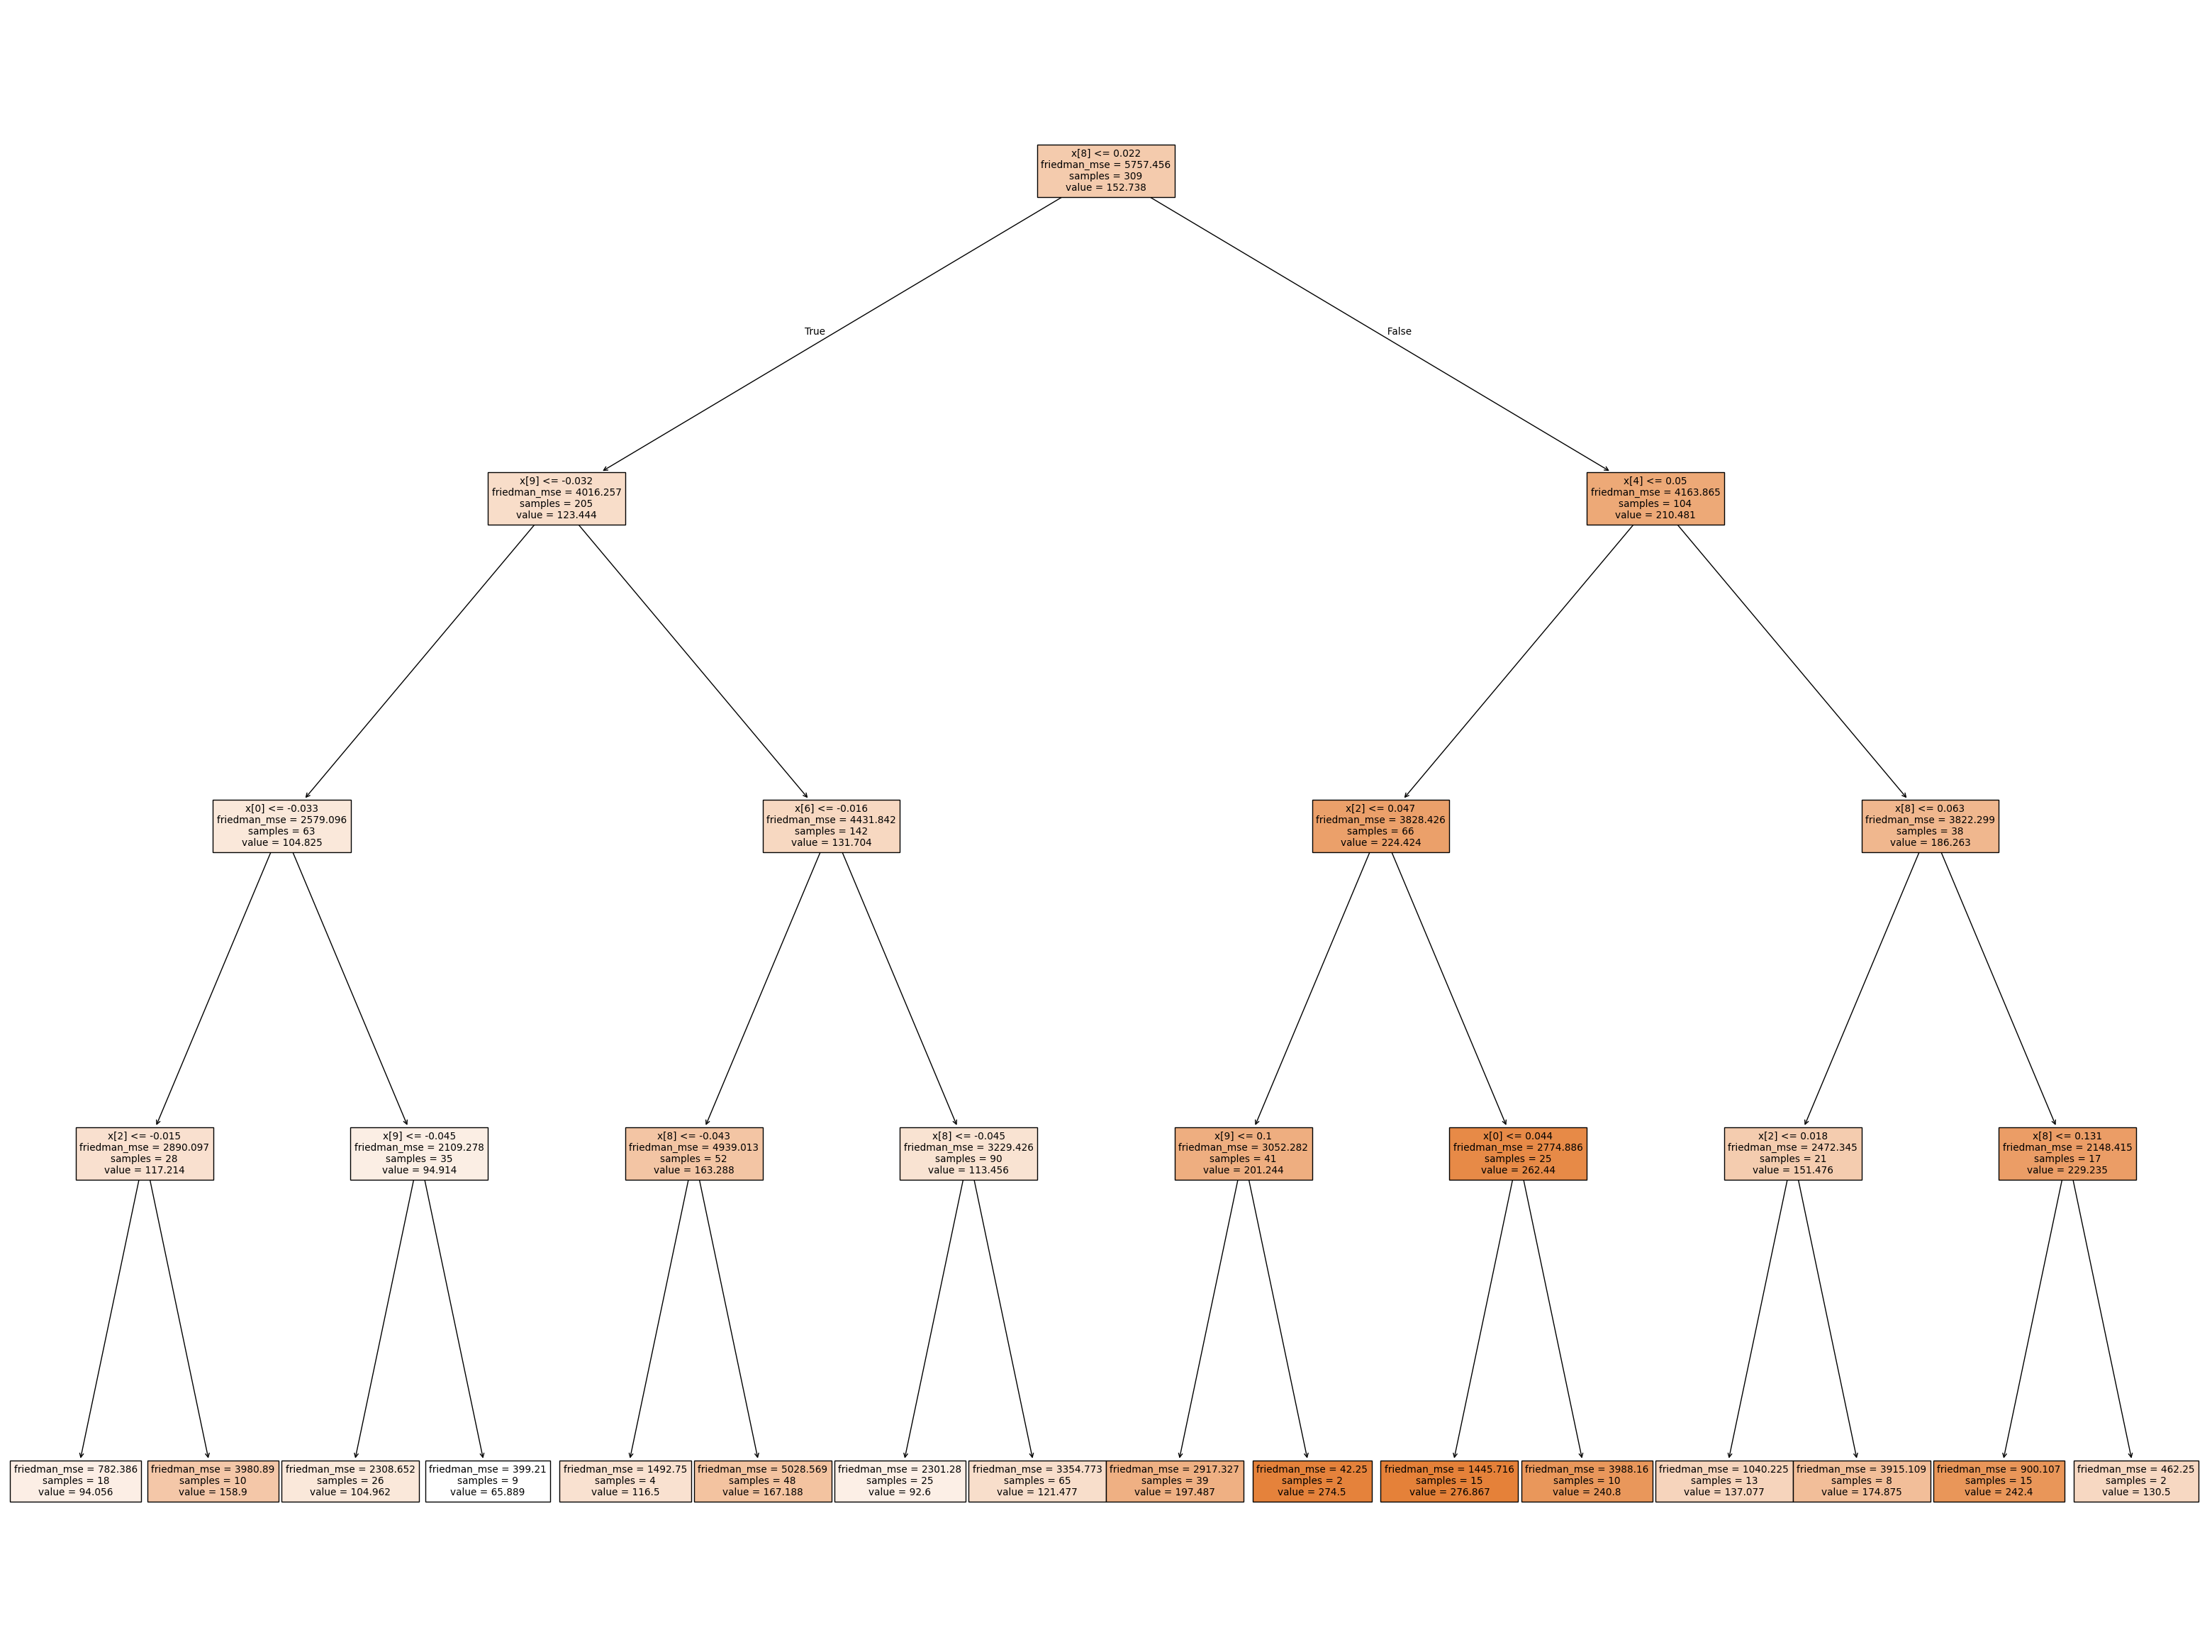

In [32]:
from sklearn import tree
plt.figure(figsize=(40, 30))
tree.plot_tree(model, filled=True)